1. company name -> check if there are any spelling mistakes, duplicate names, upper lower etc.
2. check missing duplicate values in each column
3. check outliers for numeric values, there are no outliers in this dataset
4. as in all numeric values there shoul not be any -ve value we can check in whole data set.
5. string(one,two) to continuos variables
6. create generic function for dummy variables

[I. Prerequisite](#prerequisite)

[II. Import Libraries and set required parameters](#library)

[III. Data Sourcing](#sourcing)

[IV. Data Preprocessing](#preprocessing)

[V. Exploratory Data Analysis](#eda)

[VI. Convert Categorical Variables to Continuos](#cat)

[VII. Feature Scaling](#scaling)

[VII. Feature Selection](#feature)

[VIII. Bivariate/Multivariate Analysis](#bivariate)

[IX. Bivariate/Multivariate Analysis with Probability of Charged off](#bivariate_prob)

[X. Conclusion](#Conclusion)

<a id='prerequisite'></a>

## I. Prerequisite

1. Place 'CarPrice_Assignment.csv' input file at your current working directory before running this code.

2. Please make sure that you have following python libraries imported/installed at your system:

    * numpy version	: 1.12.1 or higher
    * pandas version	: 0.20.3 or higher
    * seaborn version	: 0.8.0 or higher

<a id='library'></a>

## II. Import Libraries and set required parameters

In [679]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.2f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

<a id='sourcing'></a>

## III. Data Sourcing

In [680]:
car = pd.read_csv('CarPrice_Assignment.csv')
print('Rows & Columns ::',car.shape)
car.head()

Rows & Columns :: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


<a id='preprocessing'></a>

## IV. Data Preprocessing

In [681]:
# check if there are any null values
car.isnull().sum().sum()

0

In [682]:
# check if there are any negative values(in numeric columns)
numeric_columns = car.select_dtypes(include=['number'])
numeric_columns.columns[(numeric_columns < 0).any()]

Index(['symboling'], dtype='object')

In [683]:
# As per the problem statement variable name 'CarName'  comprised of two parts:
# first word is the name of 'car company' and the second is the 'car model'.
car['company'],car['model'] = car['CarName'].str.split(' ', 1).str

In [684]:
car[['CarName','company']].sample(4)

,CarName,company
73,buick century special,buick
79,mitsubishi g4,mitsubishi
6,audi 100ls,audi
138,subaru,subaru


In [685]:
# drop CarName column now
car.drop(labels=['CarName','model'],axis=1, inplace=True)

### data quality issues

In [686]:
# data cleaning in company column
car.company.unique()
# mazda is mis-spelled as maxda
# toyota is mis-spelled as toyouta
# porsche is mis-spelled as porcshce
# volkswagen is mis-spelled as vokswagen
# volkswagen in short form written as vw
# Nissan & nissan considered as two differnt company

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [687]:
car['company'] = car['company'].str.lower()
car['company'] = car.loc[:, 'company'].replace(['maxda', 'toyouta', 'porcshce','vokswagen','vw'], \
                              ['mazda', 'toyota', 'porsche','volkswagen','volkswagen'])

In [688]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<a id='eda'></a>

## Exploratory Data Analysis

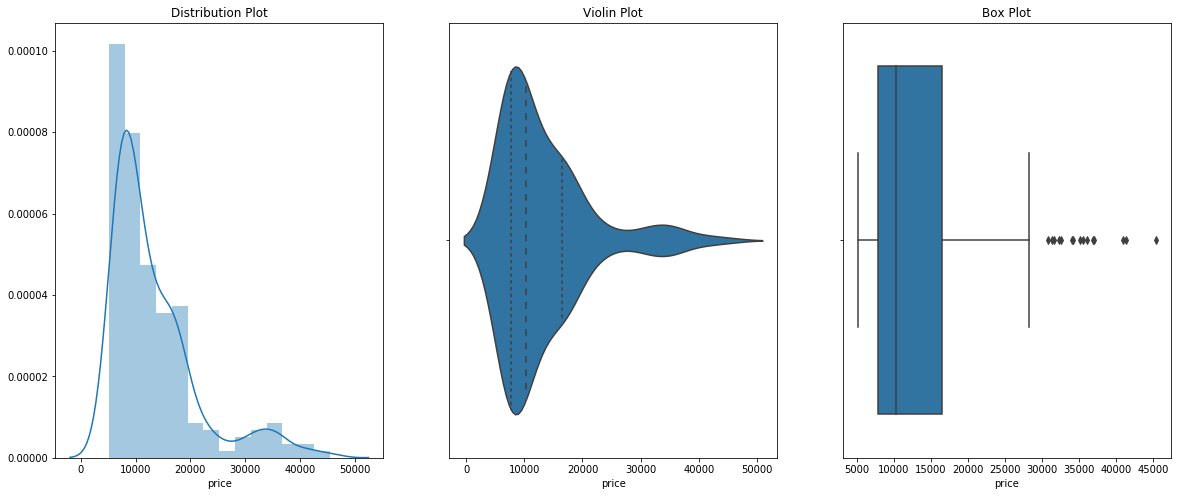

In [689]:
# car Price Distribution
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(car['price'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(car['price'],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(car['price'],ax=ax[2])
#sns.boxplot(car['price'])

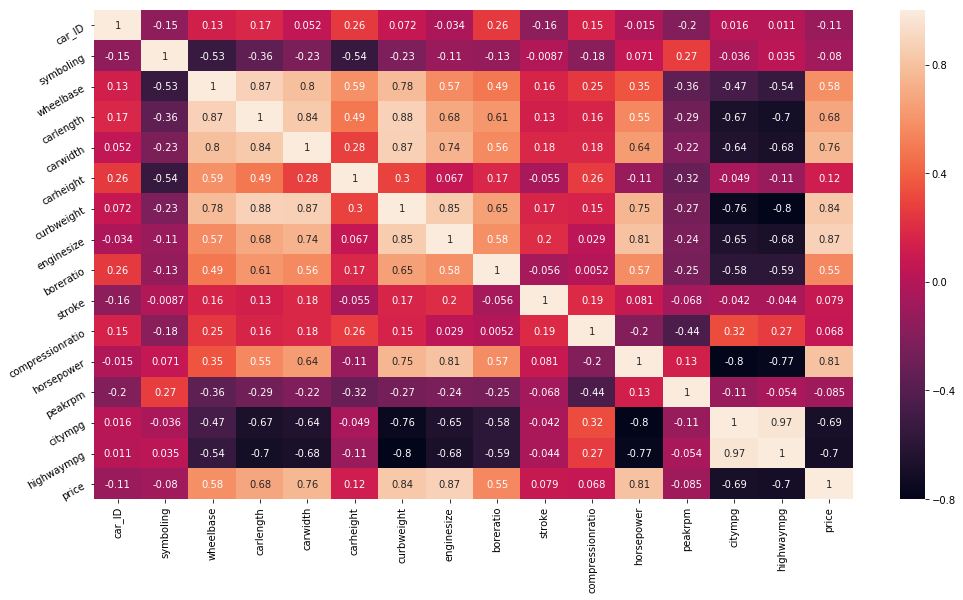

In [690]:
corr = car.corr()
plt.figure(figsize=(17,9))
ax = sns.heatmap(corr, annot=True)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

#### Insights:
1. Price is more correlated with engine size and curb weight of the car
2. Curb weight is mostly correlated with car length & car width.
3. Wheel base is highly correlated with car length & car width.

In [691]:
#car.select_dtypes(exclude=['number']).head()
# Alternatively we can use the below statement as well to get the categorical columns
#car.select_dtypes(include=['object']).head()

In [692]:
#derived metrics


In [693]:
car.sample(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
81,82,3,gas,std,two,hatchback,fwd,front,96.30,173.00,65.40,49.40,2328,ohc,four,122,2bbl,3.35,3.46,8.50,88,5000,25,32,8499.00,mitsubishi
1,2,3,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00,alfa-romero
139,140,2,gas,std,two,hatchback,fwd,front,93.70,157.90,63.60,53.70,2120,ohcf,four,108,2bbl,3.62,2.64,8.70,73,4400,26,31,7053.00,subaru
98,99,2,gas,std,two,hardtop,fwd,front,95.10,162.40,63.80,53.30,2008,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,8249.00,nissan
99,100,0,gas,std,four,hatchback,fwd,front,97.20,173.40,65.20,54.70,2324,ohc,four,120,2bbl,3.33,3.47,8.50,97,5200,27,34,8949.00,nissan


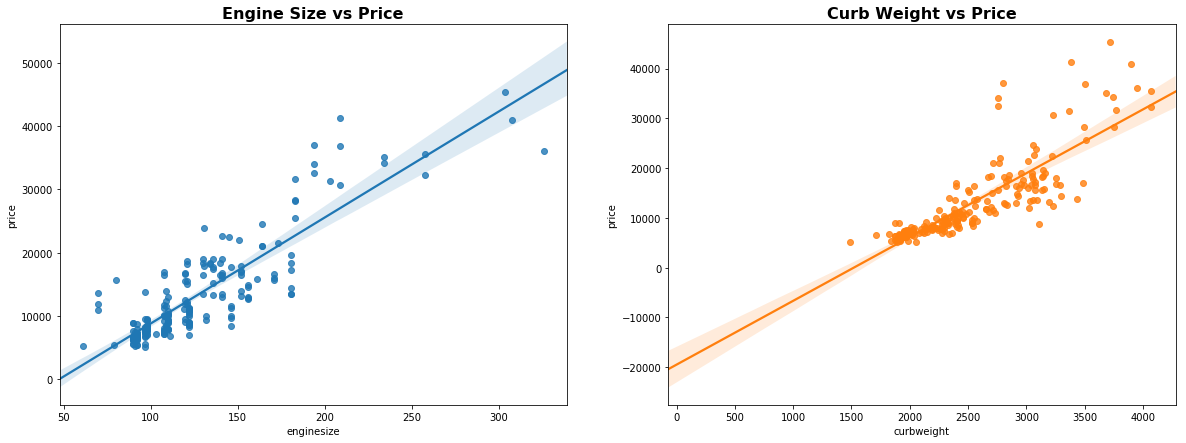

In [694]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,7))
ax[0].set_title('Engine Size vs Price',fontsize=16,weight="bold")
sns.regplot(x='enginesize',y='price', data =car,ax=ax[0])
ax[1].set_title("Curb Weight vs Price",fontsize=16,weight="bold")
sns.regplot(x='curbweight',y='price', data =car,ax=ax[1])
plt.show()

### Bivariate Analysis

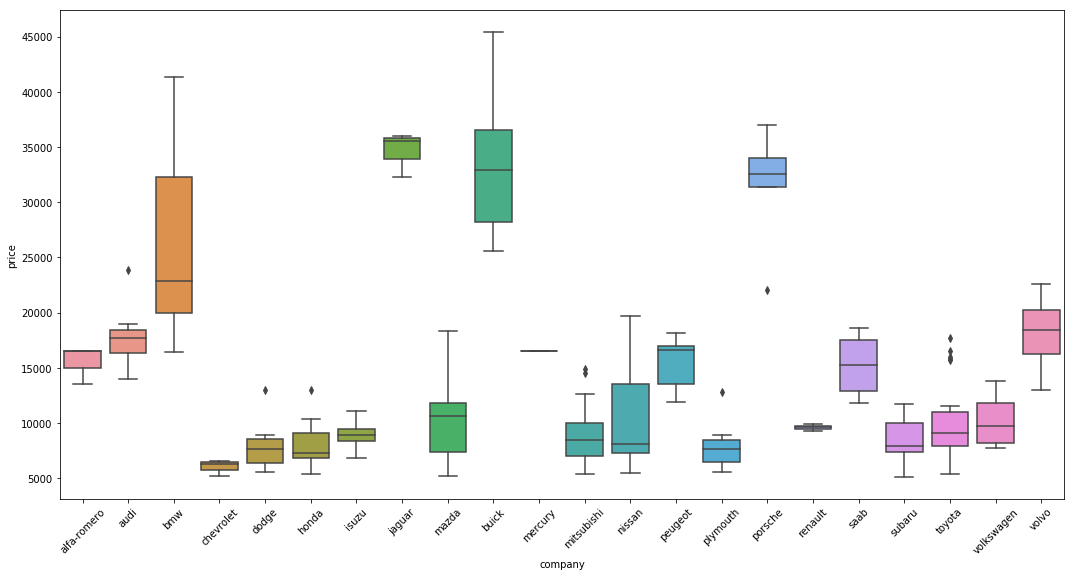

In [695]:
# Price distribution of the cars company-wise
plt.figure(figsize=(18,9))
ax = sns.boxplot(x='company',y='price',data=car)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [696]:
car.sample(10)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
132,133,3,gas,std,two,hatchback,fwd,front,99.10,186.60,66.50,56.10,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.00,saab
95,96,1,gas,std,two,hatchback,fwd,front,94.50,165.60,63.80,53.30,2028,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7799.00,nissan
72,73,3,gas,std,two,convertible,rwd,front,96.60,180.30,70.50,50.80,3685,ohcv,eight,234,mpfi,3.46,3.10,8.30,155,4750,16,18,35056.00,buick
93,94,1,gas,std,four,wagon,fwd,front,94.50,170.20,63.80,53.50,2024,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7349.00,nissan
142,143,0,gas,std,four,sedan,fwd,front,97.20,172.00,65.40,52.50,2190,ohcf,four,108,2bbl,3.62,2.64,9.50,82,4400,28,33,7775.00,subaru
29,30,3,gas,turbo,two,hatchback,fwd,front,95.90,173.20,66.30,50.20,2811,ohc,four,156,mfi,3.60,3.90,7.00,145,5000,19,24,12964.00,dodge
53,54,1,gas,std,four,sedan,fwd,front,93.10,166.80,64.20,54.10,1945,ohc,four,91,2bbl,3.03,3.15,9.00,68,5000,31,38,6695.00,mazda
13,14,0,gas,std,four,sedan,rwd,front,101.20,176.80,64.80,54.30,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105.00,bmw
58,59,3,gas,std,two,hatchback,rwd,front,95.30,169.00,65.70,49.60,2500,rotor,two,80,mpfi,3.33,3.25,9.40,135,6000,16,23,15645.00,mazda
146,147,0,gas,std,four,wagon,fwd,front,97.00,173.50,65.40,53.00,2290,ohcf,four,108,2bbl,3.62,2.64,9.00,82,4800,28,32,7463.00,subaru


<a id='cat'></a>

## Convert Categorical Variables to Continuos

In [697]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.nunique()

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
company           22
dtype: int64

In [698]:
# first convert categorical columns where there are only two distinct values to numeric(0 or 1)
car['fueltype'] = car['fueltype'].map({'gas':0, 'diesel':1})
car['aspiration'] = car['aspiration'].map({'std':0, 'turbo':1})
car['doornumber'] = car['doornumber'].map({'two':0, 'four':1})
car['enginelocation'] = car['enginelocation'].map({'front':0, 'rear':1})

In [699]:
def add_dummy(df,colname):
    """
    This function will convert the categorical column to continuos by adding dummy variables to the dataframe and 
    drop the original categorical column.
    df      :: dataframe
    colname :: name of categorical column
    """
    df_new = df.copy()
    dummy = pd.get_dummies(df_new[colname],drop_first=True)
    df_new = pd.concat([df_new,dummy],axis=1)
    df_new.drop(labels=colname,axis=1,inplace=True)
    print(colname,':::',dummy.columns.values,'\n')
    del dummy
    return df_new

In [700]:
car = add_dummy(car,'carbody')
car = add_dummy(car,'drivewheel')
car = add_dummy(car,'enginetype')
car = add_dummy(car,'fuelsystem')
car = add_dummy(car,'company')
car = add_dummy(car,'cylindernumber')

carbody ::: ['hardtop' 'hatchback' 'sedan' 'wagon'] 

drivewheel ::: ['fwd' 'rwd'] 

enginetype ::: ['dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor'] 

fuelsystem ::: ['2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi'] 

company ::: ['audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche' 'renault'
 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 

cylindernumber ::: ['five' 'four' 'six' 'three' 'twelve' 'two'] 



<a id='scaling'></a>

## Feature Scaling

In [701]:
car=(car-car.min())/(car.max()-car.min())

<a id='feature'></a>

## Feature Selection

In [702]:
# Putting feature variable to X(remove car_ID & price)
X = car.loc[:, ~car.columns.isin(['car_ID','price'])]

# Putting target variable to y
y = car['price']

In [703]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3)

In [704]:
regression = LinearRegression()

In [705]:
#rank all features
from sklearn.feature_selection import RFE
rfe = RFE(regression, n_features_to_select=1)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank::::\n")
feature_ranking = sorted(list(zip(rfe.ranking_,X_train.columns)))
print(feature_ranking)

Features sorted by their rank::::

[(1, 'enginesize'), (2, 'carwidth'), (3, 'enginelocation'), (4, 'bmw'), (5, 'curbweight'), (6, 'carlength'), (7, 'peakrpm'), (8, 'stroke'), (9, 'fueltype'), (10, 'compressionratio'), (11, 'subaru'), (12, 'ohcf'), (13, 'peugeot'), (14, 'twelve'), (15, 'six'), (16, 'idi'), (17, 'citympg'), (18, 'four'), (19, 'dohcv'), (20, 'five'), (21, 'wheelbase'), (22, 'l'), (23, 'mercury'), (24, 'mitsubishi'), (25, 'volvo'), (26, 'nissan'), (27, 'plymouth'), (28, 'dodge'), (29, 'toyota'), (30, 'mazda'), (31, 'chevrolet'), (32, 'renault'), (33, 'honda'), (34, 'volkswagen'), (35, 'isuzu'), (36, 'two'), (37, 'carheight'), (38, 'saab'), (39, 'hardtop'), (40, 'sedan'), (41, 'wagon'), (42, 'hatchback'), (43, 'rotor'), (44, 'audi'), (45, 'porsche'), (46, 'boreratio'), (47, '4bbl'), (48, 'buick'), (49, 'jaguar'), (50, '2bbl'), (51, 'aspiration'), (52, 'mfi'), (53, 'fwd'), (54, 'rwd'), (55, 'highwaympg'), (56, 'ohcv'), (57, 'mpfi'), (58, 'horsepower'), (59, 'spfi'), (60, 'sy

In [706]:
# There are 64 features, we can select top 25 features from it and then mannualy do the backward elimination based on its
# p-value & VIF

In [707]:
top_features = [x[1] for x in feature_ranking[0:25]]
X_train = X_train[top_features]
vif_data = pd.concat([car[top_features],car['price']],axis=1)
X_test = X_test[top_features]
X_train.head()

,enginesize,carwidth,enginelocation,bmw,curbweight,carlength,peakrpm,stroke,fueltype,compressionratio,subaru,ohcf,peugeot,twelve,six,idi,citympg,four,dohcv,five,wheelbase,l,mercury,mitsubishi,volvo
23,0.14,0.29,0.00,0.00,0.25,0.24,0.55,0.63,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.31,1.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00
2,0.34,0.43,0.00,0.00,0.52,0.45,0.35,0.67,0.00,0.12,0.00,0.00,0.00,0.00,1.00,0.00,0.17,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00
21,0.11,0.29,0.00,0.00,0.15,0.24,0.55,0.55,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.67,1.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00
85,0.23,0.43,0.00,0.00,0.34,0.47,0.35,0.66,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.33,1.00,0.00,0.00,0.28,0.00,0.00,1.00,0.00
35,0.12,0.31,0.00,0.00,0.20,0.33,0.76,0.64,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.47,1.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00


In [708]:
import statsmodels.api as sm          # Importing statsmodels
import statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
X_test = sm.add_constant(X_test)
# create a first fitted model

In [709]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [710]:
# Significance(p-value) is more important than multicollinearity(VIF value).
#So we will remove those features(one by one) which are having low significance(p-value > significant level).For multicollinearity
#we will check for VIF value(greater than 2.5-3) & parallely check for it's p-value , if it is greater than significant level we
#will remove that column and if p-value < significant level, we will keep that column.

#### Iteration 1

In [711]:
#Let's see the summary of our first linear model
m1 = sm.OLS(y_train,X_train).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     109.3
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.04e-68
Time:                        23:37:10   Log-Likelihood:                 245.11
No. Observations:                 143   AIC:                            -444.2
Df Residuals:                     120   BIC:                            -376.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0198      0.055     -0.357      0.722      -0.130       0.090
enginesize           0.4988      0.088      5.685      0.000       0.325       0.673
carwidth             0.3061      0.063      4.838      0.000       0.181       0.431
enginelocation       0.3481      0.038      9.208      0.000       0.273       0.423
bmw                  0.2871      0.026     10.978      0.000       0.235       0.339
curbweight           0.4700      0.106      4.445      0.000       0.261       0.679
carlength           -0.1632      0.073     -2.248      0.026      -0.307      -0.019
peakrpm              0.1499      0.030      5.033      0.000       0.091       0.209
stroke              -0.2411      0.041     -5.897      0.000      -0.322      -0.160
fueltype             0.1739      0.063      2.764      0.007       0.049       0.299
compressionratio    -0.3896      0.149     -2.608      0.010      -0.685      -0.094
subaru              -0.2117      0.024     -8.882      0.000      -0.259      -0.165
ohcf                 0.1364      0.020      6.751      0.000       0.096       0.176
peugeot             -0.0736      0.016     -4.513      0.000      -0.106      -0.041
twelve              -0.2046      0.071     -2.872      0.005      -0.346      -0.064
six                 -0.1854      0.029     -6.488      0.000      -0.242      -0.129
idi                  0.1739      0.063      2.764      0.007       0.049       0.299
citympg              0.1123      0.059      1.909      0.059      -0.004       0.229
four                -0.1050      0.027     -3.853      0.000      -0.159      -0.051
dohcv               -0.1083      0.058     -1.879      0.063      -0.222       0.006
five                -0.0869      0.032     -2.737      0.007      -0.150      -0.024
wheelbase            0.0905      0.064      1.423      0.157      -0.035       0.216
l                   -0.0736      0.016     -4.513      0.000      -0.106      -0.041
mercury             -0.0744      0.051     -1.464      0.146      -0.175       0.026
mitsubishi          -0.0414      0.018     -2.336      0.021      -0.077      -0.006
volvo               -0.0386      0.024     -1.604      0.111      -0.086       0.009
==============================================================================
Omnibus:                       14.588   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.295
Skew:                           0.624   Prob(JB):                     0.000106
Kurtosis:                       4.229   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.97e-30. 

In [712]:
# Calculating Vif value
vif_cal(input_data=vif_data, dependent_col="price")

,Var,Vif
15,idi,inf
2,enginelocation,inf
8,fueltype,inf
10,subaru,inf
11,ohcf,inf
9,compressionratio,142.56
5,carlength,86.74
4,curbweight,83.61
1,carwidth,62.11
20,wheelbase,38.62


#### Iteration 2

In [716]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wheelbase', axis =1)
vif_data = vif_data.drop('wheelbase', axis =1)

In [717]:
m2 = sm.OLS(y_train,X_train).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     117.0
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.05e-69
Time:                        23:39:19   Log-Likelihood:                 242.15
No. Observations:                 143   AIC:                            -442.3
Df Residuals:                     122   BIC:                            -380.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0333      0.056     -0.600      0.550      -0.143       0.077
enginesize           0.5341      0.086      6.186      0.000       0.363       0.705
carwidth             0.2905      0.061      4.783      0.000       0.170       0.411
enginelocation       0.3393      0.038      8.969      0.000       0.264       0.414
bmw                  0.2808      0.025     11.030      0.000       0.230       0.331
curbweight           0.3806      0.095      4.007      0.000       0.193       0.569
peakrpm              0.1590      0.029      5.452      0.000       0.101       0.217
stroke              -0.2314      0.041     -5.711      0.000      -0.312      -0.151
fueltype             0.2010      0.061      3.270      0.001       0.079       0.323
compressionratio    -0.4550      0.146     -3.111      0.002      -0.745      -0.166
subaru              -0.2052      0.024     -8.617      0.000      -0.252      -0.158
ohcf                 0.1340      0.020      6.583      0.000       0.094       0.174
peugeot             -0.0650      0.015     -4.310      0.000      -0.095      -0.035
twelve              -0.1981      0.072     -2.754      0.007      -0.341      -0.056
six                 -0.1903      0.029     -6.602      0.000      -0.247      -0.133
idi                  0.2010      0.061      3.270      0.001       0.079       0.323
citympg              0.1432      0.058      2.475      0.015       0.029       0.258
four                -0.1203      0.026     -4.543      0.000      -0.173      -0.068
dohcv               -0.0880      0.057     -1.553      0.123      -0.200       0.024
five                -0.0850      0.032     -2.687      0.008      -0.148      -0.022
l                   -0.0650      0.015     -4.310      0.000      -0.095      -0.035
mercury             -0.0542      0.051     -1.070      0.287      -0.154       0.046
mitsubishi          -0.0422      0.018     -2.355      0.020      -0.078      -0.007
volvo               -0.0324      0.023     -1.389      0.167      -0.079       0.014
==============================================================================
Omnibus:                        8.945   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.861
Skew:                           0.455   Prob(JB):                      0.00722
Kurtosis:                       3.910   Cond. No.                     1.35e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [715]:
vif_cal(input_data=vif_data, dependent_col="price")

,Var,Vif
9,subaru,inf
2,enginelocation,inf
14,idi,inf
10,ohcf,inf
7,fueltype,inf
8,compressionratio,132.03
4,curbweight,71.67
1,carwidth,57.37
0,enginesize,33.86
6,stroke,30.10


#### Iteration 3

In [677]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('peakrpm', axis =1)
vif_data = vif_data.drop('peakrpm', axis =1)

In [678]:
m3 = sm.OLS(y_train,X_train).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.05e-68
Time:                        23:35:04   Log-Likelihood:                 247.34
No. Observations:                 143   AIC:                            -450.7
Df Residuals:                     121   BIC:                            -385.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0352      0.042     -0.839      0.403      -0.118       0.048
horsepower           0.3228      0.084      3.828      0.000       0.156       0.490
carwidth             0.2007      0.063      3.182      0.002       0.076       0.326
enginelocation       0.1892      0.066      2.861      0.005       0.058       0.320
bmw                  0.2332      0.021     10.954      0.000       0.191       0.275
jaguar               0.2140      0.043      4.939      0.000       0.128       0.300
buick                0.1941      0.031      6.327      0.000       0.133       0.255
porsche              0.1742      0.051      3.449      0.001       0.074       0.274
enginesize           0.3844      0.096      4.019      0.000       0.195       0.574
two                  0.0920      0.021      4.371      0.000       0.050       0.134
highwaympg           0.1542      0.056      2.758      0.007       0.044       0.265
hardtop             -0.1160      0.033     -3.534      0.001      -0.181      -0.051
wagon               -0.1067      0.027     -3.923      0.000      -0.161      -0.053
hatchback           -0.1225      0.025     -4.830      0.000      -0.173      -0.072
sedan               -0.1052      0.026     -4.052      0.000      -0.157      -0.054
wheelbase            0.1368      0.054      2.549      0.012       0.031       0.243
rotor                0.0920      0.021      4.371      0.000       0.050       0.134
compressionratio    -0.3556      0.137     -2.590      0.011      -0.628      -0.084
idi                  0.1657      0.058      2.867      0.005       0.051       0.280
saab                 0.0563      0.025      2.283      0.024       0.007       0.105
audi                 0.0724      0.027      2.728      0.007       0.020       0.125
fueltype             0.1657      0.058      2.867      0.005       0.051       0.280
stroke              -0.0787      0.034     -2.305      0.023      -0.146      -0.011
peakrpm              0.0530      0.031      1.702      0.091      -0.009       0.115
==============================================================================
Omnibus:                       48.882   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.994
Skew:                           1.113   Prob(JB):                     1.14e-50
Kurtosis:                       8.801   Cond. No.                     7.78e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.98e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [629]:
vif_cal(input_data=vif_data, dependent_col="price")

,Var,Vif
22,idi,inf
2,enginelocation,inf
19,fueltype,inf
13,subaru,inf
12,ohcf,inf
4,curbweight,60.29
1,carwidth,55.12
20,wheelbase,35.47
6,boreratio,35.02
0,enginesize,27.57


#### Iteration 4

In [630]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wheelbase', axis =1)
vif_data = vif_data.drop('wheelbase', axis =1)

In [631]:
m4 = sm.OLS(y_train,X_train).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     245.5
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.08e-89
Time:                        23:20:58   Log-Likelihood:                 251.32
No. Observations:                 143   AIC:                            -462.6
Df Residuals:                     123   BIC:                            -403.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginesize         0.5867      0.073      8.058      0.000       0.443       0.731
carwidth           0.2779      0.052      5.358      0.000       0.175       0.381
enginelocation     0.2305      0.042      5.499      0.000       0.148       0.313
bmw                0.2246      0.023      9.694      0.000       0.179       0.270
curbweight         0.3313      0.064      5.188      0.000       0.205       0.458
porsche            0.1455      0.048      3.044      0.003       0.051       0.240
boreratio         -0.1684      0.037     -4.518      0.000      -0.242      -0.095
twelve            -0.2762      0.061     -4.540      0.000      -0.397      -0.156
six               -0.2114      0.022     -9.573      0.000      -0.255      -0.168
dohcv             -0.1940      0.067     -2.901      0.004      -0.326      -0.062
four              -0.1378      0.017     -8.260      0.000      -0.171      -0.105
five              -0.1199      0.027     -4.502      0.000      -0.173      -0.067
ohcf               0.1280      0.021      5.958      0.000       0.085       0.171
subaru            -0.1024      0.025     -4.178      0.000      -0.151      -0.054
renault           -0.1000      0.046     -2.195      0.030      -0.190      -0.010
peakrpm            0.0620      0.022      2.761      0.007       0.018       0.106
mitsubishi        -0.0543      0.016     -3.400      0.001      -0.086      -0.023
peugeot           -0.0374      0.023     -1.605      0.111      -0.084       0.009
volkswagen        -0.0458      0.019     -2.453      0.016      -0.083      -0.009
fueltype           0.0179      0.009      2.094      0.038       0.001       0.035
carheight         -0.0208      0.026     -0.794      0.429      -0.073       0.031
idi                0.0179      0.009      2.094      0.038       0.001       0.035
==============================================================================
Omnibus:                        5.760   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.666
Skew:                           0.350   Prob(JB):                       0.0588
Kurtosis:                       3.678   Cond. No.                     1.54e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [632]:
vif_cal(input_data=vif_data, dependent_col="price")

,Var,Vif
21,idi,inf
2,enginelocation,inf
19,fueltype,inf
13,subaru,inf
12,ohcf,inf
4,curbweight,59.71
1,carwidth,43.67
6,boreratio,34.92
0,enginesize,27.42
10,four,13.73


#### Iteration 5

In [633]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', axis =1)
vif_data = vif_data.drop('carheight', axis =1)

In [634]:
m5 = sm.OLS(y_train,X_train).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.41e-90
Time:                        23:22:50   Log-Likelihood:                 250.95
No. Observations:                 143   AIC:                            -463.9
Df Residuals:                     124   BIC:                            -407.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginesize         0.5984      0.071      8.406      0.000       0.457       0.739
carwidth           0.2724      0.051      5.307      0.000       0.171       0.374
enginelocation     0.2237      0.041      5.460      0.000       0.143       0.305
bmw                0.2204      0.023      9.790      0.000       0.176       0.265
curbweight         0.3134      0.060      5.254      0.000       0.195       0.431
porsche            0.1516      0.047      3.221      0.002       0.058       0.245
boreratio         -0.1636      0.037     -4.455      0.000      -0.236      -0.091
twelve            -0.2704      0.060     -4.484      0.000      -0.390      -0.151
six               -0.2143      0.022     -9.846      0.000      -0.257      -0.171
dohcv             -0.1991      0.066     -2.994      0.003      -0.331      -0.067
four              -0.1457      0.013    -10.903      0.000      -0.172      -0.119
five              -0.1256      0.026     -4.900      0.000      -0.176      -0.075
ohcf               0.1241      0.021      5.942      0.000       0.083       0.165
subaru            -0.0996      0.024     -4.112      0.000      -0.147      -0.052
renault           -0.1018      0.045     -2.240      0.027      -0.192      -0.012
peakrpm            0.0646      0.022      2.912      0.004       0.021       0.109
mitsubishi        -0.0492      0.015     -3.374      0.001      -0.078      -0.020
peugeot           -0.0372      0.023     -1.596      0.113      -0.083       0.009
volkswagen        -0.0482      0.018     -2.625      0.010      -0.085      -0.012
fueltype           0.0180      0.009      2.112      0.037       0.001       0.035
idi                0.0180      0.009      2.112      0.037       0.001       0.035
==============================================================================
Omnibus:                        7.495   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.092
Skew:                           0.394   Prob(JB):                       0.0175
Kurtosis:                       3.858   Cond. No.                     1.46e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [635]:
vif_cal(input_data=vif_data, dependent_col="price")

,Var,Vif
20,idi,inf
2,enginelocation,inf
19,fueltype,inf
13,subaru,inf
12,ohcf,inf
4,curbweight,55.67
1,carwidth,42.68
6,boreratio,34.66
0,enginesize,26.95
10,four,10.00


#### Iteration 6

In [797]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('doornumber', axis =1)
car_copy = car_copy.drop('doornumber', axis =1)

In [798]:
m6 = sm.OLS(y_train,X_train).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     56.65
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.95e-54
Time:                        17:24:54   Log-Likelihood:                -1296.3
No. Observations:                 143   AIC:                             2653.
Df Residuals:                     113   BIC:                             2741.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                -5e+04   1.82e+04     -2.752      0.007    -8.6e+04    -1.4e+04
symboling          394.9568    256.250      1.541      0.126    -112.720     902.634
fueltype          1.845e+04   3819.082      4.832      0.000    1.09e+04     2.6e+04
aspiration        1300.6025   1214.732      1.071      0.287   -1106.000    3707.205
enginelocation    1.303e+04   2730.109      4.774      0.000    7623.909    1.84e+04
wheelbase          135.1769    120.229      1.124      0.263    -103.017     373.371
carwidth           665.5419    301.377      2.208      0.029      68.460    1262.624
carheight           81.3051    154.891      0.525      0.601    -225.562     388.172
curbweight           3.6792      1.953      1.883      0.062      -0.191       7.549
cylindernumber    1761.0945    589.154      2.989      0.003     593.873    2928.316
enginesize         108.7406     28.625      3.799      0.000      52.029     165.452
stroke           -5013.3651   1277.339     -3.925      0.000   -7544.003   -2482.727
compressionratio -2853.3833    562.247     -5.075      0.000   -3967.296   -1739.470
horsepower         -23.3184     27.327     -0.853      0.395     -77.458      30.822
peakrpm              2.4163      0.746      3.239      0.002       0.938       3.894
highwaympg         188.2793     91.850      2.050      0.043       6.308     370.250
hardtop          -1813.2791   1669.514     -1.086      0.280   -5120.888    1494.330
hatchback        -3794.6545   1534.484     -2.473      0.015   -6834.744    -754.565
sedan            -2761.3755   1619.477     -1.705      0.091   -5969.851     447.100
wagon            -3992.3840   1822.000     -2.191      0.030   -7602.094    -382.674
fwd               -622.3136    676.299     -0.920      0.359   -1962.183     717.556
dohcv             6.068e-12   1.44e-12      4.216      0.000    3.22e-12    8.92e-12
l                -5098.8628   1634.890     -3.119      0.002   -8337.875   -1859.851
ohc               1077.7951   1142.570      0.943      0.348   -1185.842    3341.432
ohcf             -1630.3799   1693.611     -0.963      0.338   -4985.730    1724.970
ohcv             -5398.4364   1773.009     -3.045      0.003   -8911.087   -1885.785
rotor             5295.6095   1651.014      3.207      0.002    2024.654    8566.565
2bbl             -1042.2388   1055.726     -0.987      0.326   -3133.821    1049.344
4bbl              5295.6095   1651.014      3.207      0.002    2024.654    8566.565
idi               1.845e+04   3819.082      4.832      0.000    1.09e+04     2.6e+04
mfi                       0          0        nan        nan           0           0
mpfi              -749.8082   1243.421     -0.603      0.548   -3213.249    1713.633
spdi             -4738.2496   1592.539     -2.975      0.004   -7893.358   -1583.142
spfi              -615.

In [799]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
29,idi,inf
6,carwidth,4729.94
5,wheelbase,3131.24
7,carheight,1299.14
12,compressionratio,844.45
8,curbweight,634.07
14,peakrpm,366.79
10,enginesize,299.52
11,stroke,275.84


#### Iteration 7

In [800]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', axis =1)
car_copy = car_copy.drop('carheight', axis =1)

In [801]:
m7 = sm.OLS(y_train,X_train).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     59.04
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           2.87e-55
Time:                        17:26:05   Log-Likelihood:                -1296.4
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     114   BIC:                             2737.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.518e+04   1.56e+04     -2.892      0.005   -7.61e+04   -1.42e+04
symboling          412.7191    253.197      1.630      0.106     -88.863     914.301
fueltype          1.862e+04   3793.356      4.910      0.000    1.11e+04    2.61e+04
aspiration        1261.3588   1208.570      1.044      0.299   -1132.809    3655.527
enginelocation    1.338e+04   2639.787      5.069      0.000    8151.724    1.86e+04
wheelbase          162.7876    107.768      1.511      0.134     -50.699     376.275
carwidth           630.6615    293.025      2.152      0.033      50.182    1211.141
curbweight           3.9281      1.889      2.079      0.040       0.186       7.670
cylindernumber    1734.8015    585.153      2.965      0.004     575.618    2893.985
enginesize         105.9346     28.032      3.779      0.000      50.403     161.466
stroke           -5136.4640   1251.631     -4.104      0.000   -7615.935   -2656.993
compressionratio -2888.2934    556.523     -5.190      0.000   -3990.762   -1785.825
horsepower         -23.1934     27.239     -0.851      0.396     -77.154      30.767
peakrpm              2.3465      0.732      3.207      0.002       0.897       3.796
highwaympg         187.7677     91.552      2.051      0.043       6.403     369.132
hardtop          -1729.4154   1656.563     -1.044      0.299   -5011.055    1552.224
hatchback        -3770.5578   1528.916     -2.466      0.015   -6799.328    -741.787
sedan            -2675.4937   1606.063     -1.666      0.098   -5857.093     506.105
wagon            -3782.5741   1771.960     -2.135      0.035   -7292.813    -272.335
fwd               -563.5320    664.841     -0.848      0.398   -1880.576     753.512
dohcv             8.032e-12   2.24e-12      3.585      0.000    3.59e-12    1.25e-11
l                -5182.8219   1621.869     -3.196      0.002   -8395.732   -1969.912
ohc               1131.9091   1134.288      0.998      0.320   -1115.107    3378.925
ohcf             -1682.7800   1685.286     -0.999      0.320   -5021.319    1655.759
ohcv             -5280.2633   1753.061     -3.012      0.003   -8753.065   -1807.462
rotor             5093.1354   1600.214      3.183      0.002    1923.124    8263.147
2bbl             -1186.0517   1016.312     -1.167      0.246   -3199.358     827.254
4bbl              5093.1354   1600.214      3.183      0.002    1923.124    8263.147
idi               1.862e+04   3793.356      4.910      0.000    1.11e+04    2.61e+04
mfi                       0          0        nan        nan           0           0
mpfi              -887.7214   1211.479     -0.733      0.465   -3287.651    1512.209
spdi             -5051.4135   1471.870     -3.432      0.001   -7967.176   -2135.651
spfi              -920.7683   2650.710     -0.347      0.729   -6171.804    4330.267
=======================

In [802]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
28,idi,inf
6,carwidth,4517.54
5,wheelbase,2585.13
11,compressionratio,844.16
7,curbweight,633.07
13,peakrpm,365.08
9,enginesize,280.12
10,stroke,275.39
12,horsepower,178.37


#### Iteration 8

In [803]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fwd', axis =1)
car_copy = car_copy.drop('fwd', axis =1)

In [804]:
m8 = sm.OLS(y_train,X_train).fit()
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     61.35
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           5.15e-56
Time:                        17:27:49   Log-Likelihood:                -1296.9
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     115   BIC:                             2733.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.271e+04   1.53e+04     -2.786      0.006   -7.31e+04   -1.23e+04
symboling          372.5854    248.426      1.500      0.136    -119.499     864.670
fueltype          1.857e+04   3788.238      4.903      0.000    1.11e+04    2.61e+04
aspiration        1228.2107   1206.458      1.018      0.311   -1161.550    3617.971
enginelocation    1.348e+04   2633.995      5.118      0.000    8262.230    1.87e+04
wheelbase          158.3677    107.510      1.473      0.143     -54.588     371.324
carwidth           589.6157    288.642      2.043      0.043      17.872    1161.359
curbweight           4.3725      1.813      2.412      0.017       0.782       7.963
cylindernumber    1681.9952    581.115      2.894      0.005     530.919    2833.071
enginesize         108.6530     27.814      3.906      0.000      53.559     163.747
stroke           -5330.9608   1228.910     -4.338      0.000   -7765.195   -2896.726
compressionratio -2877.1948    555.688     -5.178      0.000   -3977.905   -1776.485
horsepower         -23.9997     27.189     -0.883      0.379     -77.856      29.857
peakrpm              2.3549      0.731      3.223      0.002       0.908       3.802
highwaympg         181.3505     91.127      1.990      0.049       0.845     361.856
hardtop          -1686.7291   1653.770     -1.020      0.310   -4962.528    1589.070
hatchback        -3815.1322   1526.140     -2.500      0.014   -6838.121    -792.143
sedan            -2762.2119   1600.838     -1.725      0.087   -5933.164     408.740
wagon            -3939.6607   1760.083     -2.238      0.027   -7426.047    -453.274
dohcv             9.739e-12   2.19e-12      4.453      0.000    5.41e-12    1.41e-11
l                -5075.9246   1614.978     -3.143      0.002   -8274.884   -1876.965
ohc               1081.6203   1131.348      0.956      0.341   -1159.363    3322.603
ohcf             -1818.3140   1675.629     -1.085      0.280   -5137.412    1500.784
ohcv             -5537.7961   1724.417     -3.211      0.002   -8953.534   -2122.058
rotor             5282.7453   1582.561      3.338      0.001    2147.997    8417.493
2bbl             -1153.6560   1014.349     -1.137      0.258   -3162.886     855.574
4bbl              5282.7453   1582.561      3.338      0.001    2147.997    8417.493
idi               1.857e+04   3788.238      4.903      0.000    1.11e+04    2.61e+04
mfi                       0          0        nan        nan           0           0
mpfi              -869.4035   1209.802     -0.719      0.474   -3265.789    1526.982
spdi             -5116.5994   1468.059     -3.485      0.001   -8024.541   -2208.658
spfi              -698.3325   2634.457     -0.265      0.791   -5916.684    4520.019
==============================================================================
Omnibus:                     

In [805]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
27,idi,inf
6,carwidth,4427.75
5,wheelbase,2584.36
11,compressionratio,842.32
7,curbweight,585.80
13,peakrpm,364.28
9,enginesize,279.74
10,stroke,269.80
12,horsepower,176.75


#### Iteration 9

In [806]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('horsepower', axis =1)
car_copy = car_copy.drop('horsepower', axis =1)

In [807]:
m9 = sm.OLS(y_train,X_train).fit()
m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           9.33e-57
Time:                        17:30:09   Log-Likelihood:                -1297.4
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     116   BIC:                             2729.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.401e+04   1.52e+04     -2.887      0.005   -7.42e+04   -1.38e+04
symboling          419.5983    242.419      1.731      0.086     -60.542     899.739
fueltype          1.891e+04   3764.835      5.024      0.000    1.15e+04    2.64e+04
aspiration         513.5192    893.560      0.575      0.567   -1256.290    2283.328
enginelocation     1.24e+04   2332.824      5.317      0.000    7783.385     1.7e+04
wheelbase          189.4599    101.479      1.867      0.064     -11.531     390.451
carwidth           587.0231    288.352      2.036      0.044      15.906    1158.140
curbweight           4.0862      1.782      2.294      0.024       0.558       7.615
cylindernumber    1661.2512    580.086      2.864      0.005     512.318    2810.185
enginesize          93.7199     22.056      4.249      0.000      50.035     137.405
stroke           -5254.4566   1224.682     -4.290      0.000   -7680.094   -2828.819
compressionratio -2897.1650    554.698     -5.223      0.000   -3995.814   -1798.516
peakrpm              2.1049      0.673      3.128      0.002       0.772       3.438
highwaympg         189.4870     90.573      2.092      0.039      10.095     368.879
hardtop          -1927.9751   1629.476     -1.183      0.239   -5155.358    1299.408
hatchback        -4294.0382   1425.085     -3.013      0.003   -7116.599   -1471.478
sedan            -3229.9110   1509.170     -2.140      0.034   -6219.012    -240.811
wagon            -4348.8614   1696.319     -2.564      0.012   -7708.634    -989.089
dohcv            -8.564e-12   2.55e-12     -3.361      0.001   -1.36e-11   -3.52e-12
l                -4632.3262   1533.333     -3.021      0.003   -7669.286   -1595.367
ohc               1408.6561   1067.944      1.319      0.190    -706.542    3523.854
ohcf             -1495.2629   1633.615     -0.915      0.362   -4730.843    1740.317
ohcv             -4930.1664   1579.553     -3.121      0.002   -8058.669   -1801.664
rotor             5002.1241   1548.823      3.230      0.002    1934.485    8069.763
2bbl             -1196.5289   1012.220     -1.182      0.240   -3201.359     808.301
4bbl              5002.1241   1548.823      3.230      0.002    1934.485    8069.763
idi               1.891e+04   3764.835      5.024      0.000    1.15e+04    2.64e+04
mfi                       0          0        nan        nan           0           0
mpfi             -1326.9763   1092.074     -1.215      0.227   -3489.967     836.015
spdi             -5253.3659   1458.469     -3.602      0.000   -8142.048   -2364.684
spfi              -725.0371   2631.774     -0.275      0.783   -5937.598    4487.523
==============================================================================
Omnibus:                       42.423   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.0

In [808]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
26,idi,inf
6,carwidth,4388.65
5,wheelbase,2330.95
11,compressionratio,839.25
7,curbweight,551.50
12,peakrpm,319.94
10,stroke,267.07
9,enginesize,210.96
8,cylindernumber,159.31


#### Iteration 10

In [809]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('aspiration', axis =1)
car_copy = car_copy.drop('aspiration', axis =1)

In [810]:
m10 = sm.OLS(y_train,X_train).fit()
m10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     66.72
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.33e-57
Time:                        17:31:27   Log-Likelihood:                -1297.6
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     117   BIC:                             2724.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.419e+04   1.52e+04     -2.908      0.004   -7.43e+04   -1.41e+04
symboling          425.4966    241.507      1.762      0.081     -52.795     903.789
fueltype          1.973e+04   3474.057      5.681      0.000    1.29e+04    2.66e+04
enginelocation    1.252e+04   2317.968      5.400      0.000    7925.483    1.71e+04
wheelbase          181.3881    100.214      1.810      0.073     -17.080     379.856
carwidth           618.8622    282.168      2.193      0.030      60.042    1177.682
curbweight           4.2144      1.762      2.391      0.018       0.724       7.705
cylindernumber    1648.0855    577.972      2.851      0.005     503.442    2792.729
enginesize          92.3853     21.871      4.224      0.000      49.071     135.699
stroke           -5326.6301   1214.734     -4.385      0.000   -7732.348   -2920.912
compressionratio -3004.4409    520.849     -5.768      0.000   -4035.954   -1972.928
peakrpm              2.1298      0.670      3.181      0.002       0.804       3.456
highwaympg         185.5750     90.058      2.061      0.042       7.219     363.931
hardtop          -1775.8947   1603.236     -1.108      0.270   -4951.019    1399.230
hatchback        -4133.3123   1393.367     -2.966      0.004   -6892.803   -1373.822
sedan            -3072.7130   1479.920     -2.076      0.040   -6003.616    -141.810
wagon            -4205.6363   1673.102     -2.514      0.013   -7519.126    -892.146
dohcv            -3.822e-12   9.45e-13     -4.044      0.000   -5.69e-12   -1.95e-12
l                -4734.9878   1518.527     -3.118      0.002   -7742.350   -1727.625
ohc               1312.6015   1051.760      1.248      0.215    -770.354    3395.557
ohcf             -1666.3971   1601.640     -1.040      0.300   -4838.362    1505.568
ohcv             -5090.3808   1550.299     -3.283      0.001   -8160.668   -2020.094
rotor             4843.9542   1519.804      3.187      0.002    1834.061    7853.847
2bbl             -1208.8955   1009.091     -1.198      0.233   -3207.348     789.557
4bbl              4843.9542   1519.804      3.187      0.002    1834.061    7853.847
idi               1.973e+04   3474.057      5.681      0.000    1.29e+04    2.66e+04
mfi                       0          0        nan        nan           0           0
mpfi             -1386.1398   1084.095     -1.279      0.204   -3533.133     760.853
spdi             -5082.5422   1423.765     -3.570      0.001   -7902.234   -2262.850
spfi              -846.4292   2615.765     -0.324      0.747   -6026.814    4333.956
==============================================================================
Omnibus:                       39.909   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.430
Skew:                           0.978   P

In [811]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
25,idi,inf
5,carwidth,4240.60
4,wheelbase,2297.28
10,compressionratio,742.58
6,curbweight,532.95
11,peakrpm,318.71
9,stroke,267.01
8,enginesize,197.13
7,cylindernumber,158.17


#### Iteration 11

In [812]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohcv', axis =1)
car_copy = car_copy.drop('ohcv', axis =1)

In [813]:
m11 = sm.OLS(y_train,X_train).fit()
m11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     63.76
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           2.64e-56
Time:                        17:32:33   Log-Likelihood:                -1303.9
No. Observations:                 143   AIC:                             2658.
Df Residuals:                     118   BIC:                             2732.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.996e+04   1.58e+04     -2.536      0.013   -7.12e+04   -8754.476
symboling          459.4048    251.087      1.830      0.070     -37.817     956.626
fueltype          1.782e+04   3563.936      5.000      0.000    1.08e+04    2.49e+04
enginelocation    1.325e+04   2400.909      5.518      0.000    8494.768     1.8e+04
wheelbase          217.7528    103.646      2.101      0.038      12.506     423.000
carwidth           428.5427    287.368      1.491      0.139    -140.525     997.610
curbweight           5.1673      1.809      2.856      0.005       1.585       8.750
cylindernumber    1214.3890    585.534      2.074      0.040      54.873    2373.905
enginesize          79.0197     22.362      3.534      0.001      34.738     123.302
stroke           -4730.5910   1249.884     -3.785      0.000   -7205.702   -2255.480
compressionratio -2675.8940    531.910     -5.031      0.000   -3729.221   -1622.567
peakrpm              2.2076      0.696      3.170      0.002       0.829       3.587
highwaympg         159.3987     93.349      1.708      0.090     -25.457     344.254
hardtop          -2197.1551   1663.010     -1.321      0.189   -5490.368    1096.058
hatchback        -4559.6255   1443.659     -3.158      0.002   -7418.463   -1700.789
sedan            -3623.5520   1530.109     -2.368      0.020   -6653.584    -593.521
wagon            -5065.1072   1719.625     -2.945      0.004   -8470.433   -1659.781
dohcv            -7.369e-12   1.28e-12     -5.742      0.000   -9.91e-12   -4.83e-12
l                -3449.5052   1526.790     -2.259      0.026   -6472.966    -426.045
ohc               2829.1219    983.308      2.877      0.005     881.905    4776.339
ohcf               270.4923   1549.541      0.175      0.862   -2798.021    3339.006
rotor             4729.5458   1581.124      2.991      0.003    1598.489    7860.603
2bbl             -1024.4688   1048.453     -0.977      0.331   -3100.692    1051.754
4bbl              4729.5458   1581.124      2.991      0.003    1598.489    7860.603
idi               1.782e+04   3563.936      5.000      0.000    1.08e+04    2.49e+04
mfi                       0          0        nan        nan           0           0
mpfi             -1094.0415   1124.327     -0.973      0.333   -3320.516    1132.433
spdi             -4698.5829   1476.594     -3.182      0.002   -7622.641   -1774.525
spfi             -1178.0242   2719.990     -0.433      0.666   -6564.345    4208.297
==============================================================================
Omnibus:                       56.311   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.918
Skew:                           1.331   Prob(JB):                     3.63e-57
Kurtosis:                       9.044   Cond. N

In [814]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
24,idi,inf
5,carwidth,3839.82
4,wheelbase,2138.47
10,compressionratio,724.82
6,curbweight,518.73
11,peakrpm,318.01
9,stroke,258.36
8,enginesize,192.80
12,highwaympg,152.13


#### Iteration 12

In [815]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('2bbl', axis =1)
car_copy = car_copy.drop('2bbl', axis =1)

In [816]:
m12 = sm.OLS(y_train,X_train).fit()
m12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     66.52
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           5.11e-57
Time:                        17:33:38   Log-Likelihood:                -1304.5
No. Observations:                 143   AIC:                             2657.
Df Residuals:                     119   BIC:                             2728.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.386e+04   1.52e+04     -2.878      0.005    -7.4e+04   -1.37e+04
symboling          409.4517    245.781      1.666      0.098     -77.220     896.123
fueltype          1.804e+04   3556.322      5.072      0.000     1.1e+04    2.51e+04
enginelocation    1.282e+04   2359.366      5.432      0.000    8145.246    1.75e+04
wheelbase          210.7901    103.381      2.039      0.044       6.085     415.495
carwidth           434.6172    287.247      1.513      0.133    -134.160    1003.394
curbweight           5.2287      1.808      2.893      0.005       1.649       8.808
cylindernumber    1217.2606    585.415      2.079      0.040      58.080    2376.441
enginesize          79.7264     22.346      3.568      0.001      35.480     123.973
stroke           -4336.1922   1182.692     -3.666      0.000   -6678.040   -1994.345
compressionratio -2637.2624    530.338     -4.973      0.000   -3687.385   -1587.140
peakrpm              2.5118      0.623      4.033      0.000       1.279       3.745
highwaympg         161.8130     93.298      1.734      0.085     -22.927     346.553
hardtop          -2368.3072   1653.446     -1.432      0.155   -5642.295     905.681
hatchback        -4656.5221   1439.975     -3.234      0.002   -7507.816   -1805.228
sedan            -3849.6296   1512.227     -2.546      0.012   -6843.990    -855.269
wagon            -5319.9609   1699.407     -3.130      0.002   -8684.957   -1954.965
dohcv            -5.902e-12    2.5e-12     -2.364      0.020   -1.08e-11   -9.58e-13
l                -3276.7952   1516.236     -2.161      0.033   -6279.095    -274.496
ohc               2865.5031    982.416      2.917      0.004     920.221    4810.785
ohcf               547.7418   1523.052      0.360      0.720   -2468.054    3563.537
rotor             5071.1021   1541.708      3.289      0.001    2018.366    8123.838
4bbl              5071.1021   1541.708      3.289      0.001    2018.366    8123.838
idi               1.804e+04   3556.322      5.072      0.000     1.1e+04    2.51e+04
mfi                       0          0        nan        nan           0           0
mpfi              -236.2538    702.331     -0.336      0.737   -1626.939    1154.431
spdi             -3987.3930   1284.504     -3.104      0.002   -6530.840   -1443.946
spfi              -328.1319   2576.682     -0.127      0.899   -5430.219    4773.955
==============================================================================
Omnibus:                       53.271   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.192
Skew:                           1.275   Prob(JB):                     2.81e-50
Kurtosis:                       8.639   Cond. No.                     1.00e+16
=====================================================

In [817]:
vif_cal(input_data=car_copy, dependent_col="price")

,Var,Vif
2,fueltype,inf
23,idi,inf
5,carwidth,3692.21
4,wheelbase,2129.16
10,compressionratio,720.97
6,curbweight,518.33
11,peakrpm,280.95
9,stroke,250.77
8,enginesize,191.91
12,highwaympg,151.54


In [637]:
# Making predictions
X_test = X_test[X_train.columns]
y_pred = m5.predict(X_test)

In [638]:
# computing rmse and r^2
mse = mean_squared_error(y_test,y_pred)
print(mse)
r_square = r2_score(y_test,y_pred)
print(r_square)

0.0047792276631
0.890281064279


In [635]:
#Backward Elimination with p-values only:

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 


In [731]:
#Backward Elimination with p-values and Adjusted R Squared:

import statsmodels.formula.api as sm
def backwardElimination(X_train, SL,y_train):
    numVars = len(X_train)
    temp = np.zeros((X_train.shape)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_train,X_train).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = X_train[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y_train,X_train).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((X_train, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

In [732]:
SL = 0.05
len(X_train)
X_Modeled = backwardElimination(X_train, SL,y_train)

TypeError: unhashable type: 'slice'